### Importing the Required Libraries

In [2]:
# Importing the required python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [3]:
# Creating the dataframe of the results of every ODI Match

match_results_df = pd.read_csv('ODI_Match_info.csv')
match_results_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [4]:
# We're only taking India's matches into consideration here

match_results_df = match_results_df[(match_results_df['team1'] == 'India') | (match_results_df['team2'] == 'India')]
match_results_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
7,1388412,2023,Colombo,2023/09/15,Bangladesh,India,India,field,normal,0,Bangladesh,6,0,Shakib Al Hasan,"R Premadasa Stadium, Colombo",Asif Yaqoob,RK Illingworth,P Wilson
13,1388407,2023,Colombo,2023/09/12,India,Sri Lanka,India,bat,normal,0,India,41,0,DN Wellalage,"R Premadasa Stadium, Colombo",Masudur Rahman,RK Illingworth,P Wilson


In [5]:
# Here we are creating the dataframe which will store the batting scorecards since 2019 till 2023
# The CSV is not UTF-8 encoded so we had to pass the encoding parameter as well

batsman_df = pd.read_csv('India_Batting_ODI_Dataset_2019_to_2023.csv', encoding='ISO-8859-1')
batsman_df.head()

,MatchID,Name,WicketType,Runs,Balls,Minutes,4s,6s,SR
0,1144490,Shikhar Dhawan,c de Kock b Rabada,8,12,23.0,1,0,66.66
1,1144490,Rohit Sharma,not out,122,144,212.0,13,2,84.72
2,1144490,Virat Kohli (c),c de Kock b Phehlukwayo,18,34,44.0,1,0,52.94
3,1144490,KL Rahul,c du Plessis b Rabada,26,42,71.0,2,0,61.9
4,1144490,MS Dhoni,c & b Morris,34,46,69.0,2,0,73.91


In [6]:
# Here we are creating the dataframe which will store the bowling scorecards since 2019 till 2023

bowler_df = pd.read_csv('India_Bowling_ODI_Dataset_2019_to_2023.csv')
bowler_df.head()

,MatchID,BOWLING,Overs,Maidens,Runs,Wickets,ECON,0s,4s,6s,WD,NB
0,1144490,Bhuvneshwar Kumar,10.0,0,44,2,4.40,33,3,0,2,0
1,1144490,Jasprit Bumrah,10.0,1,35,2,3.50,41,4,0,0,0
2,1144490,Hardik Pandya,6.0,0,31,0,5.16,16,2,0,0,0
3,1144490,Kuldeep Yadav,10.0,0,46,1,4.60,28,2,1,1,0
4,1144490,Yuzvendra Chahal,10.0,0,51,4,5.10,32,1,2,3,0


### Data Cleaning

In [7]:
# We need only the data after 2018

from datetime import datetime
match_results_df['date'] = pd.to_datetime(match_results_df['date'], errors='coerce')
match_results_df = match_results_df[match_results_df['date'].dt.year >= 2019]
match_results_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,1388414,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
7,1388412,2023,Colombo,2023-09-15,Bangladesh,India,India,field,normal,0,Bangladesh,6,0,Shakib Al Hasan,"R Premadasa Stadium, Colombo",Asif Yaqoob,RK Illingworth,P Wilson
13,1388407,2023,Colombo,2023-09-12,India,Sri Lanka,India,bat,normal,0,India,41,0,DN Wellalage,"R Premadasa Stadium, Colombo",Masudur Rahman,RK Illingworth,P Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1153692,2018/19,Mount Maunganui,2019-01-26,New Zealand,India,India,bat,normal,0,India,90,0,RG Sharma,Bay Oval,CM Brown,NJ Llong,S George
564,1153691,2018/19,Napier,2019-01-23,New Zealand,India,New Zealand,bat,D/L,1,India,0,8,Mohammed Shami,McLean Park,SB Haig,S George,NJ Llong
567,1144999,2018/19,Melbourne,2019-01-18,Australia,India,India,field,normal,0,India,0,7,YS Chahal,Melbourne Cricket Ground,P Wilson,MA Gough,RA Kettleborough
568,1144998,2018/19,Adelaide,2019-01-15,Australia,India,Australia,bat,normal,0,India,0,6,V Kohli,Adelaide Oval,RA Kettleborough,SJ Nogajski,MA Gough


In [8]:
match_results_df.isnull().sum()

id                 0
season             0
city               2
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [9]:
# There are 4 matches without a Winner
# These are the abandoned matches so we wont be using this data

match_results_df = match_results_df.dropna(subset=['winner'])

In [10]:
batsman_df.isnull().sum()

MatchID        0
Name           0
WicketType     0
Runs           0
Balls          0
Minutes       77
4s             0
6s             0
SR             1
dtype: int64

In [11]:
bowler_df.isnull().sum()

MatchID    0
BOWLING    0
Overs      0
Maidens    0
Runs       0
Wickets    0
ECON       0
0s         0
4s         0
6s         0
WD         0
NB         0
dtype: int64

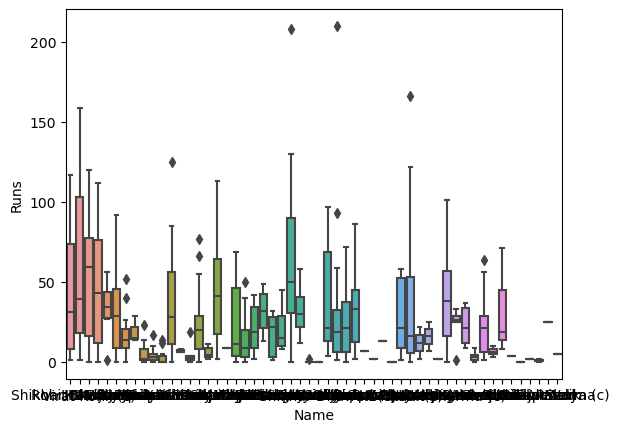

In [12]:
# We have done this to identify outliers
# A batsman may score more than 200 runs, so they cannot be classified as outliers

sns.boxplot(x='Name', y='Runs', data=batsman_df)
plt.show()

### Data Preprocessing

In [13]:
# Firstly, let's rename the columns

array_match_results_df_columns = {'id': 'Match_ID','season': 'Season','city': 'City','date': 'Date','team1': 'Team1', 'team2': 'Team2', 'toss_winner': 'Toss', 'toss_decision': 'Toss_Decision', 'result': 'Result', 'dl_applied': 'DL_Applied', 'winner': 'Winner', 'win_by_runs': 'Win_By_Runs', 'win_by_wickets': 'Win_By_Wickets', 'player_of_match': 'MOTM', 'venue': 'Venue', 'umpire1': 'Umpire1', 'umpire2': 'Umpire2', 'umpire3':'Umpire3'}
match_results_df.rename(columns = array_match_results_df_columns, inplace = True)
match_results_df.head()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_14144\2536481721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_results_df.rename(columns = array_match_results_df_columns, inplace = True)


,Match_ID,Season,City,Date,Team1,Team2,Toss,Toss_Decision,Result,DL_Applied,Winner,Win_By_Runs,Win_By_Wickets,MOTM,Venue,Umpire1,Umpire2,Umpire3
0,1389389,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
3,1389388,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,1388414,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
7,1388412,2023,Colombo,2023-09-15,Bangladesh,India,India,field,normal,0,Bangladesh,6,0,Shakib Al Hasan,"R Premadasa Stadium, Colombo",Asif Yaqoob,RK Illingworth,P Wilson
13,1388407,2023,Colombo,2023-09-12,India,Sri Lanka,India,bat,normal,0,India,41,0,DN Wellalage,"R Premadasa Stadium, Colombo",Masudur Rahman,RK Illingworth,P Wilson


In [14]:
# For Bowlers data

bowler_df.rename(columns = {'MatchID' : 'Match_ID' , 'BOWLING' : 'Name'}, inplace = True)
bowler_df.head()

,Match_ID,Name,Overs,Maidens,Runs,Wickets,ECON,0s,4s,6s,WD,NB
0,1144490,Bhuvneshwar Kumar,10.0,0,44,2,4.40,33,3,0,2,0
1,1144490,Jasprit Bumrah,10.0,1,35,2,3.50,41,4,0,0,0
2,1144490,Hardik Pandya,6.0,0,31,0,5.16,16,2,0,0,0
3,1144490,Kuldeep Yadav,10.0,0,46,1,4.60,28,2,1,1,0
4,1144490,Yuzvendra Chahal,10.0,0,51,4,5.10,32,1,2,3,0


In [15]:
# For Batsman data

batsman_df.rename(columns = {'MatchID' : 'Match_ID' , 'BOWLING' : 'Name'}, inplace = True)
batsman_df.head()

,Match_ID,Name,WicketType,Runs,Balls,Minutes,4s,6s,SR
0,1144490,Shikhar Dhawan,c de Kock b Rabada,8,12,23.0,1,0,66.66
1,1144490,Rohit Sharma,not out,122,144,212.0,13,2,84.72
2,1144490,Virat Kohli (c),c de Kock b Phehlukwayo,18,34,44.0,1,0,52.94
3,1144490,KL Rahul,c du Plessis b Rabada,26,42,71.0,2,0,61.9
4,1144490,MS Dhoni,c & b Morris,34,46,69.0,2,0,73.91


In [16]:
# Now that we have neatly labelled the columns, let's proceed with data transformation
# Firsly, we will create a column which will show if the batsman is out or not out

batsman_df['WicketType'] = batsman_df.WicketType.apply(lambda x: "NotOut" if x == 'not out' else "Out")
batsman_df.head()

,Match_ID,Name,WicketType,Runs,Balls,Minutes,4s,6s,SR
0,1144490,Shikhar Dhawan,Out,8,12,23.0,1,0,66.66
1,1144490,Rohit Sharma,NotOut,122,144,212.0,13,2,84.72
2,1144490,Virat Kohli (c),Out,18,34,44.0,1,0,52.94
3,1144490,KL Rahul,Out,26,42,71.0,2,0,61.9
4,1144490,MS Dhoni,Out,34,46,69.0,2,0,73.91


In [17]:
batsman_df['Name'] = batsman_df['Name'].apply(lambda x : x.replace('(c)', ''))
batsman_df['Name'] = batsman_df['Name'].apply(lambda x : x.replace('†', ''))
batsman_df['Name'] = batsman_df['Name'].apply(lambda x : x.replace('\xa0', ''))
batsman_df.head()

,Match_ID,Name,WicketType,Runs,Balls,Minutes,4s,6s,SR
0,1144490,Shikhar Dhawan,Out,8,12,23.0,1,0,66.66
1,1144490,Rohit Sharma,NotOut,122,144,212.0,13,2,84.72
2,1144490,Virat Kohli,Out,18,34,44.0,1,0,52.94
3,1144490,KL Rahul,Out,26,42,71.0,2,0,61.9
4,1144490,MS Dhoni,Out,34,46,69.0,2,0,73.91


In [18]:
# The minutes column is irrelevant so we will drop it

batsman_df.drop(columns = 'Minutes', inplace = True)
batsman_df.head()

,Match_ID,Name,WicketType,Runs,Balls,4s,6s,SR
0,1144490,Shikhar Dhawan,Out,8,12,1,0,66.66
1,1144490,Rohit Sharma,NotOut,122,144,13,2,84.72
2,1144490,Virat Kohli,Out,18,34,1,0,52.94
3,1144490,KL Rahul,Out,26,42,2,0,61.9
4,1144490,MS Dhoni,Out,34,46,2,0,73.91


In [19]:
unique_batsman_df = batsman_df['Name'].unique()
unique_batsman_df

array(['Shikhar Dhawan', 'Rohit Sharma', 'Virat Kohli', 'KL Rahul',
       'MS Dhoni', 'Hardik Pandya', 'Kedar Jadhav', 'Vijay Shankar',
       'Mohammed Shami', 'Kuldeep Yadav', 'Jasprit Bumrah',
       'Rishabh Pant', 'Dinesh Karthik', 'Bhuvneshwar Kumar',
       'Ravindra Jadeja', 'Yuzvendra Chahal', 'Shreyas Iyer',
       'Shivam Dube', 'Deepak Chahar', 'Shardul Thakur', 'Manish Pandey',
       'Prithvi Shaw', 'Mayank Agarwal', 'Navdeep Saini', 'Shubman Gill',
       'Krunal Pandya', 'Prasidh Krishna', 'T Natarajan', 'Ishan Kishan',
       'Suryakumar Yadav', 'Sanju Samson', 'Nitish Rana',
       'Krishnappa Gowtham', 'Rahul Chahar', 'Chetan Sakariya',
       'Venkatesh Iyer', 'Ravichandran Ashwin', 'Jayant Yadav',
       'Deepak Hooda', 'Washington Sundar', 'Mohammed Siraj',
       'Axar Patel', 'Avesh Khan', 'Ruturaj Gaikwad', 'Ravi Bishnoi',
       'Shahbaz Ahmed', 'Kuldeep Sen', 'Umran Malik', 'Tilak Varma'],
      dtype=object)

In [20]:
unique_bowler_df = bowler_df['Name'].unique()
unique_bowler_df

array(['Bhuvneshwar Kumar', 'Jasprit Bumrah', 'Hardik Pandya',
       'Kuldeep Yadav', 'Yuzvendra Chahal', 'Kedar Jadhav',
       'Vijay Shankar', 'Mohammed Shami', 'Ravindra Jadeja',
       'Khaleel Ahmed', 'Deepak Chahar', 'Shivam Dube', 'Shardul Thakur',
       'Shreyas Iyer', 'Navdeep Saini', 'Mayank Agarwal', 'T Natarajan',
       'Prasidh Krishna', 'Krunal Pandya', 'Chetan Sakariya',
       'Rahul Chahar', 'Krishnappa Gowtham', 'Nitish Rana',
       'Ravichandran Ashwin', 'Venkatesh Iyer', 'Jayant Yadav',
       'Mohammed Siraj', 'Washington Sundar', 'Deepak Hooda',
       'Axar Patel', 'Avesh Khan', 'Ravi Bishnoi', 'Shahbaz Ahmed',
       'Arshdeep Singh', 'Umran Malik', 'Kuldeep Sen', 'Tilak Varma'],
      dtype=object)

### Players Data

In [21]:
# This is the individual player data

players_info_df = pd.read_csv('Players_Data.csv')
players_info_df.head(5)

,Name,Batting Type,Bowling Type,Role
0,Shikhar Dhawan,Left Hand Bat,Right Arm Off Spin,Top Order Batsman
1,MS Dhoni,Right Hand Bat,NaN,Wicket Keeper Batsman
2,Mohammed Shami,Right Hand Bat,Right Arm Fast,Bowler
3,Rishabh Pant,Left Hand Bat,NaN,Wicket Keeper Batsman
4,Ravindra Jadeja,Left Hand Bat,Left Arm Off Spin,All Rounder


### Exporting the Files

In [34]:
batsman_df.to_csv(r'C:\Users\Shubham\CRICKET DATA ANALYSIS PROJECT\cleaned_batsman_df.csv', index = True, encoding = 'UTF-8')

In [35]:
bowler_df.to_csv(r'C:\Users\Shubham\CRICKET DATA ANALYSIS PROJECT\cleaned_bowler_df.csv', index = True, encoding = 'UTF-8')

In [22]:
match_results_df.to_csv(r'C:\Users\Shubham\CRICKET DATA ANALYSIS PROJECT\match_results_df.csv', index = True, encoding = 'UTF-8')